In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#load data
data=pd.read_csv('boston.csv')
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
data.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


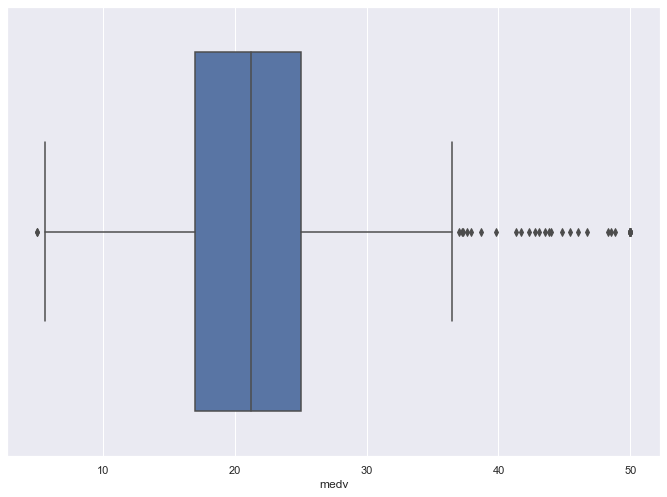

In [5]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.boxplot(data['medv'])
plt.show()

In [6]:
#Remove the outlier from the data

Q1=np.percentile(data['medv'],25,interpolation='midpoint')
Q3=np.percentile(data['medv'],75,interpolation='midpoint')
IQR=Q3-Q1

print("Old data:",data.shape)

upper=np.where(data['medv']>=(Q3+1.5*IQR))
lower=np.where(data['medv']<=(Q1-1.5*IQR))

data.drop(upper[0],inplace=True)
data.drop(lower[0],inplace=True)

print("New Shape:",data.shape)

Old data: (506, 14)
New Shape: (466, 14)


In [7]:
#split train test
from sklearn.model_selection import train_test_split

feature = data.drop(columns='medv')
target = data[['medv']]

feature_data_pretrain, feature_data_test, target_data_pretrain, target_data_test = train_test_split(feature, target, test_size=0.20, random_state=42)

feature_data_train, feature_data_validation, target_data_train, target_data_validation = train_test_split(feature_data_pretrain, target_data_pretrain, test_size=0.20, random_state=42)

In [95]:
# calculate VIF scores
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif 
from statsmodels.tools.tools import add_constant

X = add_constant(feature_admit_train)

vif_df = pd.DataFrame([vif(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,feature,vif_score
1,crim,2.311119
2,zn,2.292413
3,indus,4.187875
4,chas,1.057250
5,nox,4.450553
6,rm,1.932500
7,age,2.858506
8,dis,4.042662
9,rad,7.143121
10,tax,8.768640


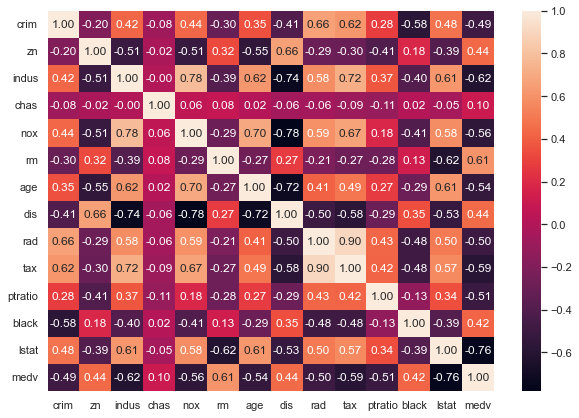

In [8]:
# heatmap correlation
data_train = pd.concat([feature_data_train, target_data_train], axis=1)
corr = data_train.corr()

plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True, fmt='.2f')
plt.show()

In [9]:
feature_data_train = feature_data_train.drop(columns=['tax','rad'])
feature_data_validation = feature_data_validation.drop(columns=['tax','rad'])
feature_data_test = feature_data_test.drop(columns=['tax','rad'])


In [10]:
#Cek VIP

from statsmodels.stats.outliers_influence import variance_inflation_factor as vif 
from statsmodels.tools.tools import add_constant

X = add_constant(feature_data_train)

vif_df = pd.DataFrame([vif(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,feature,vif_score
1,crim,1.859018
2,zn,2.131836
3,indus,3.470427
4,chas,1.037576
5,nox,4.028681
6,rm,1.854426
7,age,2.792132
8,dis,4.029992
9,ptratio,1.466573
10,black,1.666039


In [11]:
#Train multipel lamda for RIDGE
from sklearn.linear_model import Ridge

# train the model
X_data_train = feature_data_train.to_numpy()
y_data_train = target_data_train.to_numpy()
y_data_train = y_data_train.reshape(len(y_data_train),)

# define the model
ridge_reg_pointzeroone = Ridge(alpha=0.01, random_state=42)
ridge_reg_pointone = Ridge(alpha=0.1, random_state=42)
ridge_reg_one = Ridge(alpha=1, random_state=42)
ridge_reg_ten = Ridge(alpha=10, random_state=42)

# fit the model (training)
ridge_reg_pointzeroone.fit(X_data_train, y_data_train)
ridge_reg_pointone.fit(X_data_train, y_data_train)
ridge_reg_one.fit(X_data_train, y_data_train)
ridge_reg_ten.fit(X_data_train, y_data_train)

Ridge(alpha=10, random_state=42)

In [12]:
#find the best model RIDGE
from sklearn.metrics import mean_squared_error

X_data_validation = feature_data_validation.to_numpy()
y_data_validation = target_data_validation.to_numpy()
y_data_validation = y_data_validation.reshape(len(y_data_validation),)

alphas = [0.01, 0.1, 1., 10]
models = [ridge_reg_pointzeroone,
          ridge_reg_pointone,
          ridge_reg_one,
          ridge_reg_ten]

for model, alpha in zip(models, alphas):
    y_predict_validation = model.predict(X_data_validation)
    rmse = np.sqrt(mean_squared_error(y_data_validation,y_predict_validation))
    print(f'RMSE of Ridge regression model with alpha = {alpha} is {rmse}')

RMSE of Ridge regression model with alpha = 0.01 is 2.929085125842714
RMSE of Ridge regression model with alpha = 0.1 is 2.9167446483672883
RMSE of Ridge regression model with alpha = 1.0 is 2.8952522346748535
RMSE of Ridge regression model with alpha = 10 is 2.946959169064696


In [22]:
#Coefficients RIDGE
ridge_best = ridge_reg_pointone

coef_df = pd.DataFrame({
    'feature':['Intercept'] + feature_data_train.columns.tolist(),
    'coefficient':[model.intercept_] + list(model.coef_)
})

coef_df

,feature,coefficient
0,Intercept,21.575671
1,crim,-0.000000
2,zn,0.035454
3,indus,-0.000000
4,chas,0.000000
5,nox,-0.000000
6,rm,0.000000
7,age,-0.037459
8,dis,0.000000
9,ptratio,-0.000000


In [23]:
#Train multipel lamda for lasso
from sklearn.linear_model import Lasso

# train the model
X_data_train = feature_data_train.to_numpy()
y_data_train = target_data_train.to_numpy()
y_data_train = y_data_train.reshape(len(y_data_train),)

# define the model
lasso_reg_pointzeroone = Lasso(alpha=0.01, random_state=42)
lasso_reg_pointone = Lasso(alpha=0.1, random_state=42)
lasso_reg_one = Lasso(alpha=1, random_state=42)
lasso_reg_ten = Lasso(alpha=10, random_state=42)

# fit the model (training)
lasso_reg_pointzeroone.fit(X_data_train, y_data_train)
lasso_reg_pointone.fit(X_data_train, y_data_train)
lasso_reg_one.fit(X_data_train, y_data_train)
lasso_reg_ten.fit(X_data_train, y_data_train)

Lasso(alpha=10, random_state=42)

In [24]:
from sklearn.metrics import mean_squared_error

X_data_validation = feature_data_validation.to_numpy()
y_data_validation = target_data_validation.to_numpy()
y_data_validation = y_data_validation.reshape(len(y_data_validation),)

alphas = [0.01, 0.1, 1., 10]
models = [lasso_reg_pointzeroone,
          lasso_reg_pointone,
          lasso_reg_one,
          lasso_reg_ten]

for model, alpha in zip(models, alphas):
    y_predict_validation = model.predict(X_data_validation)
    rmse = np.sqrt(mean_squared_error(y_data_validation,y_predict_validation))
    print(f'RMSE of Lasso regression model with alpha = {alpha} is {rmse}')

RMSE of Lasso regression model with alpha = 0.01 is 2.9055429129534307
RMSE of Lasso regression model with alpha = 0.1 is 2.9969413445850352
RMSE of Lasso regression model with alpha = 1.0 is 3.414997214263781
RMSE of Lasso regression model with alpha = 10 is 4.225752793271933


In [25]:
#Coefficient LASSO
lasso_best = lasso_reg_pointzeroone

coef_df = pd.DataFrame({
    'feature':['Intercept'] + feature_data_train.columns.tolist(),
    'coefficient':[model.intercept_] + list(model.coef_)
})

coef_df

,feature,coefficient
0,Intercept,21.575671
1,crim,-0.000000
2,zn,0.035454
3,indus,-0.000000
4,chas,0.000000
5,nox,-0.000000
6,rm,0.000000
7,age,-0.037459
8,dis,0.000000
9,ptratio,-0.000000


In [26]:
#Evaluate RIDGE
# prepare prediction result on train data
y_predict_train = ridge_best.predict(X_data_train)

In [27]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('RMSE for training data is {}'.format(np.sqrt(mean_squared_error(y_predict_train, y_data_train))))
print('MAE for training data is {}'.format(mean_absolute_error(y_predict_train, y_data_train)))
print('MAPE for training data is {}'.format(mean_absolute_percentage_error(y_predict_train, y_data_train)))

RMSE for training data is 3.328876590524891
MAE for training data is 2.5421739936743117
MAPE for training data is 0.14201797882058012


In [28]:
# prepare prediction result on test data
X_data_test = feature_data_test.to_numpy()
y_predict_test = ridge_best.predict(X_data_test)

# ground truth target
y_data_test = target_data_test.to_numpy()
y_data_test = y_data_test.reshape(len(y_data_test),)

In [29]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('RMSE for testing data is {}'.format(np.sqrt(mean_squared_error(y_predict_test, y_data_test))))
print('MAE for testing data is {}'.format(mean_absolute_error(y_predict_test, y_data_test)))
print('MAPE for testing data is {}'.format(mean_absolute_percentage_error(y_predict_test, y_data_test)))

RMSE for testing data is 3.3623905584520983
MAE for testing data is 2.3913801019057024
MAPE for testing data is 0.12488539669189094


In [30]:
#Evaluate LASSO
# prepare prediction result on train data
y_predict_train = lasso_best.predict(X_data_train)

In [31]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('RMSE for training data is {}'.format(np.sqrt(mean_squared_error(y_predict_train, y_data_train))))
print('MAE for training data is {}'.format(mean_absolute_error(y_predict_train, y_data_train)))
print('MAPE for training data is {}'.format(mean_absolute_percentage_error(y_predict_train, y_data_train)))

RMSE for training data is 3.333309909828795
MAE for training data is 2.5518048304084227
MAPE for training data is 0.14275208466997416


In [32]:
# prepare prediction result on test data
X_data_test = feature_data_test.to_numpy()
y_predict_test = lasso_best.predict(X_data_test)

# ground truth target
y_data_test = target_data_test.to_numpy()
y_data_test = y_data_test.reshape(len(y_data_test),)

In [33]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('RMSE for testing data is {}'.format(np.sqrt(mean_squared_error(y_predict_test, y_data_test))))
print('MAE for testing data is {}'.format(mean_absolute_error(y_predict_test, y_data_test)))
print('MAPE for testing data is {}'.format(mean_absolute_percentage_error(y_predict_test, y_data_test)))

RMSE for testing data is 3.3454819497564805
MAE for testing data is 2.378100888903815
MAPE for testing data is 0.12385239184868403
